In [1]:
from hamiltonians import load_Molecule

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pylab
from typing import List 
import qutip as qt
from tqdm import tqdm
from qiskit.algorithms import VQE
from qiskit_nature.algorithms import GroundStateEigensolver,NumPyMinimumEigensolverFactory
from qiskit_nature.drivers import Molecule
from qiskit_nature.drivers.second_quantization import ElectronicStructureMoleculeDriver, ElectronicStructureDriverType
from qiskit_nature.transformers.second_quantization.electronic import ActiveSpaceTransformer
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import ParityMapper

from qiskit_nature.circuit.library import UCCSD, HartreeFock
from qiskit.circuit.library import EfficientSU2
from qiskit.opflow import TwoQubitReduction
from qiskit import BasicAer, Aer
from qiskit.utils import QuantumInstance
from qiskit.utils.mitigation import CompleteMeasFitter
from qiskit.providers.aer.noise import NoiseModel

from qiskit import Aer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP,SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.opflow import I, X, Z, Y
from qiskit.circuit import Parameter, ParameterVector, QuantumCircuit, QuantumRegister 

from numbers import Number

from qiskit.circuit import Gate, QuantumCircuit, QuantumRegister, ParameterExpression
from qiskit.quantum_info.operators.predicates import matrix_equal
from qiskit.quantum_info.operators.predicates import is_hermitian_matrix
from qiskit.extensions.exceptions import ExtensionError
from qiskit.circuit.exceptions import CircuitError

from qiskit.circuit import Parameter, QuantumCircuit, QuantumRegister 


from qiskit.extensions.unitary import UnitaryGate

In [3]:
import pylab
import matplotlib.pyplot as plt

from qiskit import Aer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.opflow import I, X, Z

In [9]:
# quantum setup - choose simulator and optimiser
backend = BasicAer.get_backend("statevector_simulator")
slsqp = SLSQP(5)
spsa = SPSA(100)

ia_dist = np.arange(0.5, 5, 0.2)
reference_e0 = []
vqe_spsa_e0 = []

for dist in ia_dist:
    BeH2 = load_Molecule('BeH2', dist)
    c_solver = NumPyMinimumEigensolverFactory()
    calc1 = GroundStateEigensolver(BeH2[2], c_solver)
    ref_result = calc1.solve(BeH2[1])
    
    qubit_ham = BeH2[0]
    problem = BeH2[1]
    converter = BeH2[2]
    
    reference_e0.append(ref_result.total_energies[0].real)
    init_state = HartreeFock(problem.num_spin_orbitals, problem.num_particles, converter)
    var_form = UCCSD(converter, problem.num_particles, problem.num_spin_orbitals, initial_state=init_state)
# run VQE with SPSA
    vqe_spsa = VQE(var_form, spsa, quantum_instance=backend)
    vqe_spsa_calc = vqe_spsa.compute_minimum_eigenvalue(qubit_ham)
    vqe_spsa_result = problem.interpret(vqe_spsa_calc).total_energies[0].real
    vqe_spsa_e0.append(vqe_spsa_result)

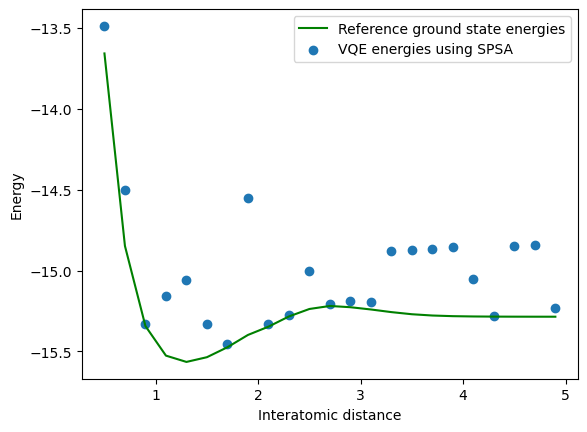

In [11]:
plt.plot(ia_distances, reference_e0, color = 'green', label="Reference ground state energies")
plt.scatter(ia_distances, vqe_spsa_e0, label="VQE energies using SPSA")
#plt.plot(ia_distances, vqe_slsqp_e0, color = 'yellow', label="VQE energies using SLSQP")
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.legend()
plt.show()